### IMPORTS

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### QUESTÃO 1

In [ ]:
resenhas_train = "/train"

textos_train = []
y_train = []

for arquivo in os.listdir(os.path.join(resenhas_train, 'pos')):
    with open(os.path.join(resenhas_train, 'pos', arquivo), encoding='utf-8') as f:
        textos_train.append(f.read())
        y_train.append(1)

for arquivo in os.listdir(os.path.join(resenhas_train, 'neg')):
    with open(os.path.join(resenhas_train, 'neg', arquivo), encoding='utf-8') as f:
        textos_train.append(f.read())
        y_train.append(0)

vetor = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vetor.fit_transform(textos_train)

resenhas_test = "/test"
textos_test = []
y_test = []

for arquivo in os.listdir(os.path.join(resenhas_test, 'pos')):
    with open(os.path.join(resenhas_test, 'pos', arquivo), encoding='utf-8') as f:
        textos_test.append(f.read())
        y_test.append(1)

for arquivo in os.listdir(os.path.join(resenhas_test, 'neg')):
    with open(os.path.join(resenhas_test, 'neg', arquivo), encoding='utf-8') as f:
        textos_test.append(f.read())
        y_test.append(0)

X_test = vetor.transform(textos_test)

### QUESTÃO 2

In [72]:
media_tfidf = np.mean(X_train.toarray(), axis=0)
palavras = vetor.get_feature_names_out()

indices_maiores = np.argsort(media_tfidf)[-10:][::-1]
print("MAIORES\n")
for i in indices_maiores:
    print(f"{palavras[i]}: {media_tfidf[i]:.6f}")

indices_menores = np.argsort(media_tfidf)[:10]
print("\nMENORES\n")
for i in indices_menores:
    print(f"{palavras[i]}: {media_tfidf[i]:.6f}")

MAIORES

br: 0.100922
movie: 0.053374
film: 0.044372
like: 0.025320
just: 0.023791
good: 0.022667
really: 0.019082
story: 0.018960
time: 0.018746
bad: 0.018019

MENORES

benoit: 0.000060
taker: 0.000068
ppv: 0.000081
zenia: 0.000081
booker: 0.000082
undertaker: 0.000087
jaffar: 0.000090
hackenstein: 0.000092
conroy: 0.000094
ripley: 0.000096


#### QUESTÃO 3

In [ ]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia * 100:.2f}%")


Acurácia: 88.00%


#### QUESTÃO 4

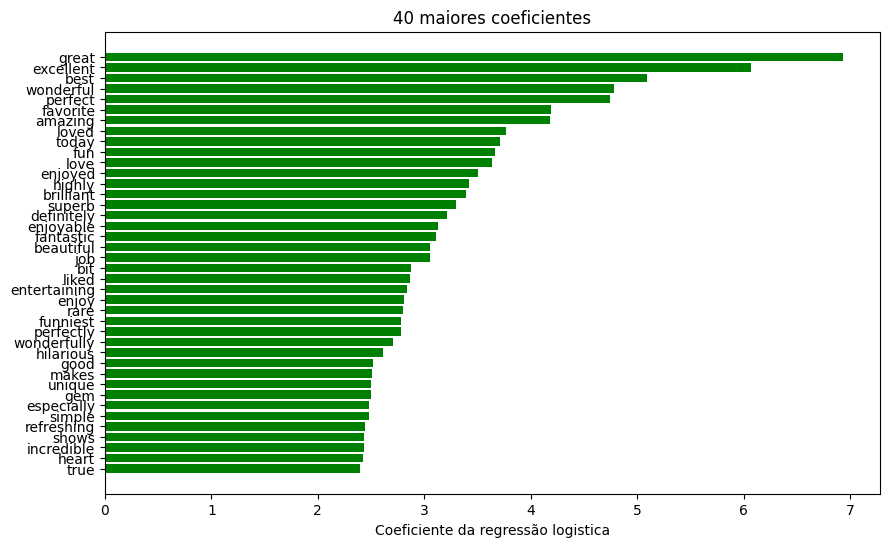

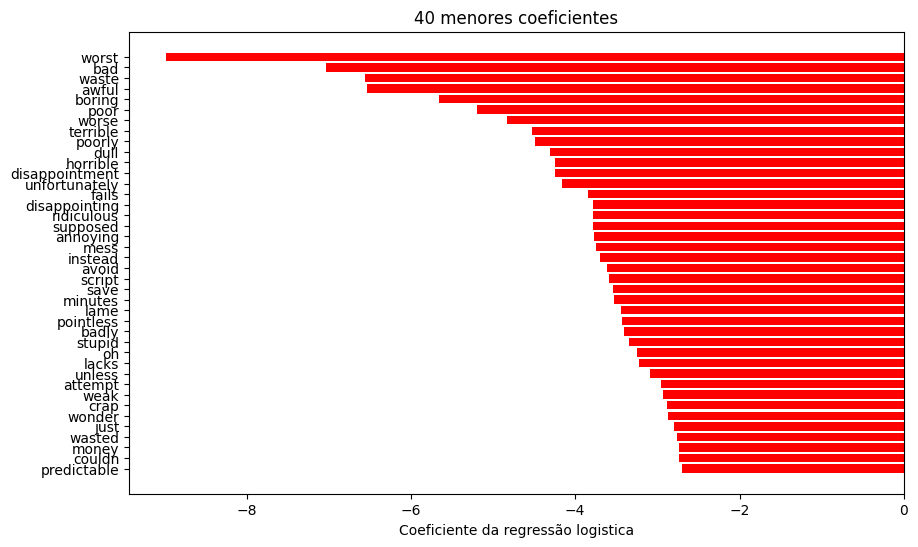

In [74]:
coeficientes = modelo.coef_.flatten()

df_coef = pd.DataFrame({'palavra': palavras, 'coeficiente': coeficientes})
df_ordenado = df_coef.sort_values(by='coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_ordenado.head(40)['palavra'][::-1], df_ordenado.head(40)['coeficiente'][::-1], color='green')
plt.title("40 maiores coeficientes")
plt.xlabel("Coeficiente da regressão logistica")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(df_ordenado.tail(40)['palavra'], df_ordenado.tail(40)['coeficiente'], color='red')
plt.title("40 menores coeficientes")
plt.xlabel("Coeficiente da regressão logistica")
plt.show()
